# The Galactic Voyager: Predicting the Transported Settlers
Alex Reese, Scott Ratchford, Ben Fioresi
### Introduction
In this lab, we worked with data from the Galactic Voyager, an intergalactic cruiser that faced an unexpected event while navigating near Alpha Centauri en route to its primary destination—the torrid 55 Cancri E. Objective.

Our mission was to predict which settlers were transported to an alternate dimension during the Galactic Voyager's encounter with a spacetime distortion. To aid us in making these predictions, we have been provided with a dataset containing personal records salvaged from the ship's compromised database.

Our approach will involve two main steps:
1.	Creating visualizations using `matplotlib`, which will allow us to immediately identify any significant factors affecting the `Transported` status.
2.	Then, we will analyze the data further using the TensorFlow Decision Forests model to determine if it can effectively predict the `Transported` status. To achieve this, we will:
  *   Experiment with different methods of preparing the data for training, using `scikit-learn`.
  *   Utilize TensorFlow's hyperparameter tuner to explore various combinations of parameters.

In [ ]:
!pip install tensorflow_decision_forests

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('train.csv', encoding = "utf-8-sig")

# Separate the Cabin column using '/' as the delimiter
data[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = data['Cabin'].str.split('/', expand=True)

# Separate the Name column and keep only the first letter of each name
data['Name_first'] = data['Name'].str.split().str[0].str[0]
data['Name_last'] = data['Name'].str.split().str[-1].str[0]

# Separate the PassengerId column using '_' as the delimiter
data[['PassengerId_1', 'PassengerId_2']] = data['PassengerId'].str.split('_', expand=True)
data['PassengerId_1'] = pd.to_numeric(data['PassengerId_1'], errors='coerce')
data['PassengerId_2'] = pd.to_numeric(data['PassengerId_2'], errors='coerce')

### Data Exploration and Feature Importance Analysis
The following code blocks generate visualizations of the distributions of each column with respect to the `Transported` column.

Many pieces of the data seem to have little correlation with the `Transported` column. `CryoSleep`, however, was strongly correlated with it. Most passengers who used cryo sleep were transported, and most who did not use it were not transported. A massive portion of passengers with an `Age` below 15 were transported.

Other columns, like `VIP`, have so little data for certain values that their correlation with the `Transported` column are either unmeasurable or insignificant. As another example, `Age` is strongly skewed to lower values, making any significant analysis of higher ages difficult. Analysis of the spending columns, `RoomService`, `FoodCourt`, `Spa`, `VRDeck`, and `ShoppingMall` had so little data on the high spenders that proper analysis was impossible.

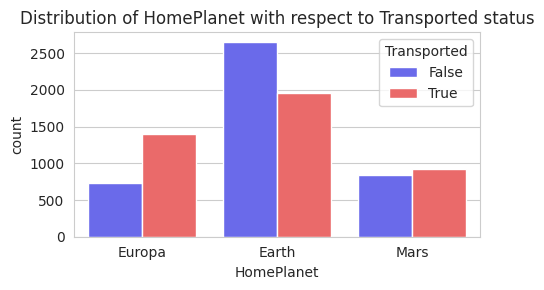

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the distribution of the 'HomePlanet' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='HomePlanet', hue='Transported', palette='seismic')
plt.title('Distribution of HomePlanet with respect to Transported status')
plt.tight_layout()
plt.show()

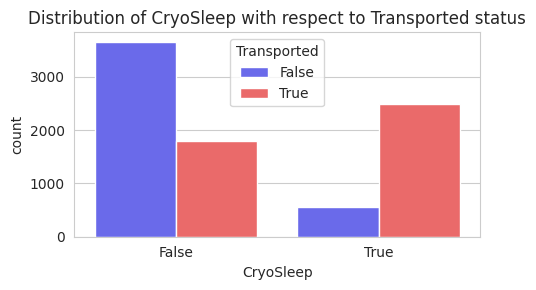

In [ ]:
# Plot the distribution of the 'CryoSleep' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='CryoSleep', hue='Transported', palette='seismic')
plt.title('Distribution of CryoSleep with respect to Transported status')
plt.tight_layout()
plt.show()

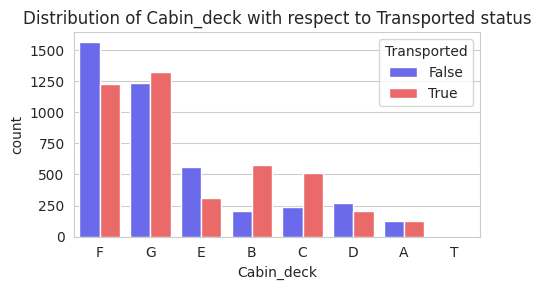

In [ ]:
# Plot the distribution of the 'Cabin.deck' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Cabin_deck', hue='Transported', palette='seismic', order=data['Cabin_deck'].value_counts().index)
plt.title('Distribution of Cabin_deck with respect to Transported status')
plt.tight_layout()
plt.show()

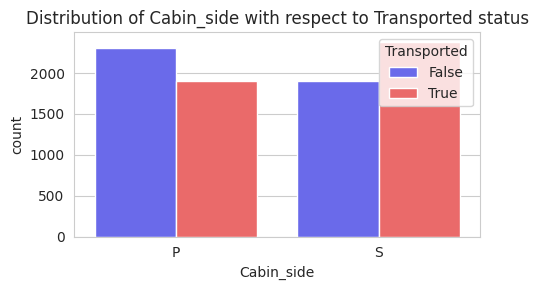

In [ ]:
# Plot the distribution of the 'Cabin.side' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Cabin_side', hue='Transported', palette='seismic')
plt.title('Distribution of Cabin_side with respect to Transported status')
plt.tight_layout()
plt.show()

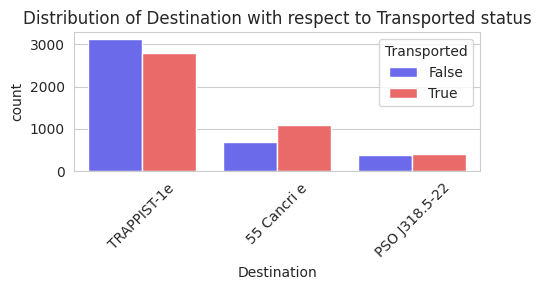

In [ ]:
# Plot the distribution of the 'Destination' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Destination', hue='Transported', palette='seismic', order=data['Destination'].value_counts().index)
plt.title('Distribution of Destination with respect to Transported status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

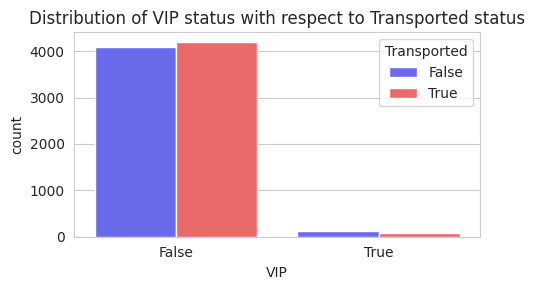

In [ ]:
# Plot the distribution of the 'VIP' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='VIP', hue='Transported', palette='seismic')
plt.title('Distribution of VIP status with respect to Transported status')
plt.tight_layout()
plt.show()

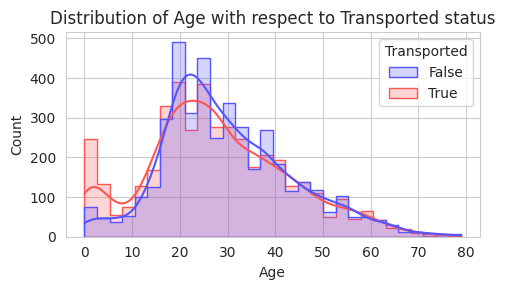

In [ ]:
# Plot the distribution of the 'Age' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.histplot(data=data, x='Age', hue='Transported', palette='seismic', bins=30, kde=True, element="step")
plt.title('Distribution of Age with respect to Transported status')
plt.tight_layout()
plt.show()

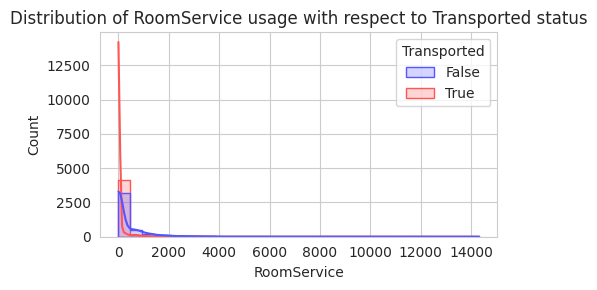

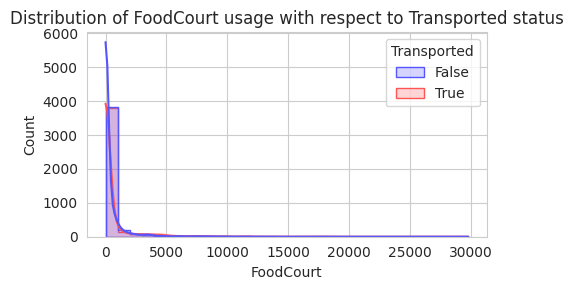

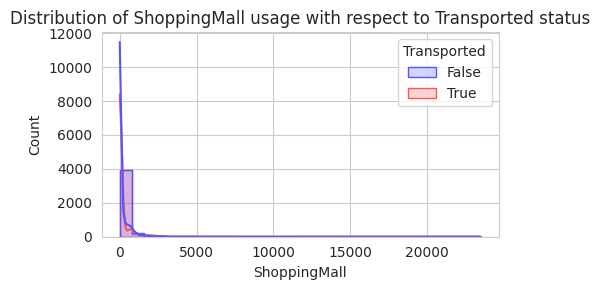

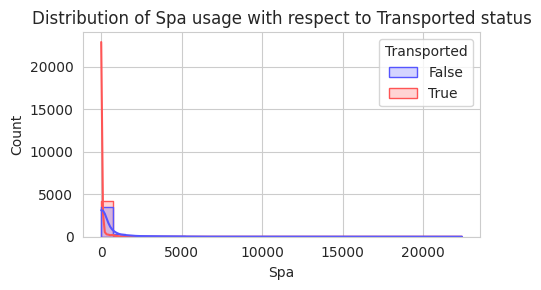

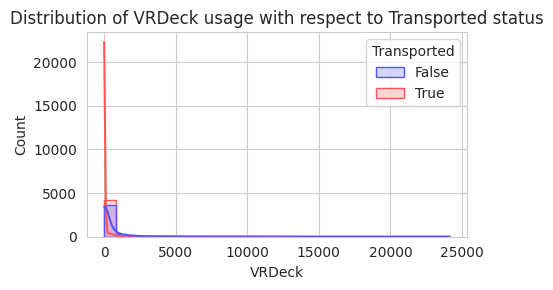

In [ ]:
# Plot the distribution of the 'RoomService' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.histplot(data=data, x='RoomService', hue='Transported', palette='seismic', bins=30, kde=True, element="step")
plt.title('Distribution of RoomService usage with respect to Transported status')
plt.tight_layout()
plt.show()

# Plot the distribution of the 'FoodCourt' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.histplot(data=data, x='FoodCourt', hue='Transported', palette='seismic', bins=30, kde=True, element="step")
plt.title('Distribution of FoodCourt usage with respect to Transported status')
plt.tight_layout()
plt.show()

# Plot the distribution of the 'ShoppingMall' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.histplot(data=data, x='ShoppingMall', hue='Transported', palette='seismic', bins=30, kde=True, element="step")
plt.title('Distribution of ShoppingMall usage with respect to Transported status')
plt.tight_layout()
plt.show()

# Plot the distribution of the 'Spa' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.histplot(data=data, x='Spa', hue='Transported', palette='seismic', bins=30, kde=True, element="step")
plt.title('Distribution of Spa usage with respect to Transported status')
plt.tight_layout()
plt.show()

# Plot the distribution of the 'VRDeck' column with respect to the 'Transported' column
plt.figure(figsize=(5, 3))
sns.histplot(data=data, x='VRDeck', hue='Transported', palette='seismic', bins=30, kde=True, element="step")
plt.title('Distribution of VRDeck usage with respect to Transported status')
plt.tight_layout()
plt.show()

### Data Preprocessing
We took the following steps to clean and prepare the data:
* Dropped the columns `PassengerId`, `Name`, `Cabin`, and `Cabin_num`, as they won't be used for training.
* To handle missing values, we filled numerical and categorical columns with the median or mode of that column respectively.
* Converted the boolean values for the `CryoSleep`, `VIP`, and `Transported` columns to integers.
* Integer encoded the categorical columns
* Split the data into training and validation sets; we then saved these datasets to CSV files


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# # Convert spending columns to binary (0 if 0, 1 if greater than 0)
# columns_to_binary = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# for col in columns_to_binary:
#     data[col] = (data[col] > 0).astype(int)

###############


# Handle missing values: Fill numerical columns with median and categorical columns with mode
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

# Convert boolean columns to integer
data['CryoSleep'] = data['CryoSleep'].astype(int)
data['VIP'] = data['VIP'].astype(int)
data['Transported'] = data['Transported'].astype(int)

# Integer encode categorical columns
label_encoders = {}
for col in ['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination']:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col] = le

# # Normalize numerical columns
# scaler = StandardScaler()
# numerical_cols = ['Cabin.num', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [ ]:
# Drop columns that won't be used for training
#data = data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Cabin_num', 'PassengerId_1','HomePlanet','CryoSleep', 'Cabin_deck', 'Cabin_side', 'Destination', 'VIP'])
data = data.drop(columns=['PassengerId', 'Name', 'Name_first', 'Name_last', 'Cabin', 'Cabin_num'])

# Split data into training and validation sets                              # stratify insures equal ratio
train_data, test_data = train_test_split(data, test_size=0.2, random_state=32, stratify=data['Age'])

# Save the training and test datasets to CSV files
train_data.to_csv('train_data.csv', index=False, encoding="utf-8-sig")
test_data.to_csv('test_data.csv', index=False, encoding="utf-8-sig")


### Model Selection and Training
We were required to use the TensorFlow Random Forest Model.

---
After analyzing the visualizations, it appears that there are no obvious linear relationships. One of the strengths of TensorFlow's Random Forest Trees is their ability to analyze non-linear relationships, and the capability to perform feature importance evaluations will be valuable.

**Only run one of the next two blocks!**

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

# Convert the data to TensorFlow datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="Transported")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="Transported")

# Configure the tuner.
tuner = tfdf.tuner.RandomSearch(num_trials=1)
tuner.choice("num_candidate_attributes_ratio", [x / 10.0 for x in range(-10, 10)])
tuner.choice("max_depth", list(range(3, 100)))
tuner.choice("num_trees", list(range(50, 1000)))

# Configure and train the model.
model = tfdf.keras.RandomForestModel(tuner=tuner)
model.fit(train_ds)


Use /tmp/tmpwjr17_6n as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.385335. Found 6954 examples.
Training model...
Model trained in 0:00:26.565839
Compiling model...
Model compiled.


### Default Hyperparameters

The following code block searches through the hyperparameters with the built in tensorflow tuner. We found that relatively simple models (by maximum depth and number of trees) worked best. Even values below the library's defaults often produced similar results to our best. With under 10 levels of depth and 50 trees, accuracy was approximately 78%. Higher levels had rapidly diminishing returns, eventually degrading performance and crashing the kernel.

We also attempted to adjust several other hyperparameters, including the missing values policy. We concluded that the differences in global, local, and random local imputation were insignificant, perhaps due to the relatively small size of the data set.

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

# Load the training dataset
dataset_df = pd.read_csv('train_data.csv', encoding = "utf-8-sig")

# Convert the training data to TensorFlow dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="Transported")

# Create a Random Forest model
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

#model.save('trained_model')

Use /tmp/tmpmqa9tz0c as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.363657. Found 6954 examples.
Training model...
Model trained in 0:00:07.349287
Compiling model...
Model compiled.


### Model Evaluation
We used the `sklearn.metrics` module to evaluate
the following metrics:
* **Accuracy** (number of correct predictions)
* **Precision** (ratio of correctly predicted positives to total predicted positives)
* **Recall** (ratio of correctly predicted possitives to all actual positives)
* **F1 Score** (weighted average of Precision and Recall)
* **ROC AUC** (Receiver Operating Characteristic - Area Under Curve, evaluates the ability of the model to differentiate between positives and negatives)
* **Confusion Matrix** (table used to evaluate the performance of the model, showing the actual vs. predicted classifications).

## Our Results
Accuracy: 0.8125359401955147

Precision: 0.8375

Recall: 0.7736720554272517

F1 Score: 0.8043217286914767

ROC AUC: 0.8966631746863171

Confusion Matrix:
`[[743 130] [196 670]]`

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load the testing dataset
dataset_df = pd.read_csv('test_data.csv', encoding = "utf-8-sig")

# Convert the testing data to TensorFlow dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, task=tfdf.keras.Task.CLASSIFICATION, label="Transported")

# gather predictions from test data
predictions_proba = model.predict(test_ds).flatten()
predicted_classes = (predictions_proba > 0.5).astype(int)
true_labels = test_data["Transported"].values

# calculate the evaluation metrics
accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes)
recall = recall_score(true_labels, predicted_classes)
f1 = f1_score(true_labels, predicted_classes)
roc_auc = roc_auc_score(true_labels, predictions_proba)  # Note: Here we use the probabilities, not the thresholded predictions
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)



2/2 [==============================] - 0s 32ms/step
Accuracy: 0.7975848188614146
Precision: 0.8386308068459658
Recall: 0.7571743929359823
F1 Score: 0.7958236658932714
ROC AUC: 0.8907404021211135
Confusion Matrix:
[[701 132]
 [220 686]]


In [ ]:
# Fetch the global feature importances
model.summary()

Model: "random_forest_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (14):
	Age
	Cabin_deck
	Cabin_side
	CryoSleep
	Destination
	FoodCourt
	HomePlanet
	PassengerId_1
	PassengerId_2
	RoomService
	ShoppingMall
	Spa
	VIP
	VRDeck

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.   "RoomService"  0.182631 ################
    2.           "Spa"  0.181609 ###############
    3.     "CryoSleep"  0.172638 ##############
    4.        "VRDeck"  0.160887 ############
    5.     "FoodCourt"  0.138995 #########
    6. "PassengerId_1"  0.125623 ######
    7.  "ShoppingMall"  0.125031 ######
    8.           "Age"  0.116269 #####
    9.    "HomePlanet"  0.116022 

### Conclusions

#### Findings
We found that a combination of `Age`, `CryoSleep`, and `HomePlanet` yielded the most significant contributions to our predictions. While various parts of `PassengerID` took up a large portion of the model's nodes, this was mostly due to the large number of unique values present in the data set.

#### Challenges
Our most significant challenge was the preprocessing of the data. Many of the columns contained data types that our libraries were incompatible with. We had to convert those and normalize the values of certain columns. We also faced trouble with hyperparamter value selection, as there is a wide range of possible values and many hyperparameters. We spent many hours searching the space of hyperparameter combinations, but most of our efforts produced no improvement.

#### Recommendations for Future Analysis
We recommend that any further exploration of the data set be done with a different type of machine learning model, such as a neural network. The number of features and large number of unique values for many of them led to the creation of many near-useless nodes in the decision forest. Perhaps this issue could be worked around by further preprocessing of the data set, such as engineering more relevant features from the data set. We attempted this with the combination of the money-related features into a single feature, but it was less accurate than not engineering the feature.

### References
* [Official TFDF reference page](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel)
* [Feature Engineering on GeeksForGeeks](https://www.geeksforgeeks.org/what-is-feature-engineering/)
* [TFDF Youtube Example](https://www.youtube.com/watch?v=Qwr3V7DGu7U)



Final Test.csv Predictions

In [ ]:
import tensorflow_decision_forests as tfdf
import pandas as pd

In [ ]:
# Load the dataset
data = pd.read_csv('test.csv', encoding='utf-8-sig')

# Extract PassengerId before any preprocessing that might alter the dataframe
passenger_ids = data['PassengerId']

# Separate the Cabin column using '/' as the delimiter
data[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = data['Cabin'].str.split('/', expand=True)

# Separate the Name column and keep only the first letter of each name
data['Name_first'] = data['Name'].str.split().str[0].str[0]
data['Name_last'] = data['Name'].str.split().str[-1].str[0]

# Separate the PassengerId column using '_' as the delimiter
data[['PassengerId_1', 'PassengerId_2']] = data['PassengerId'].str.split('_', expand=True)
data['PassengerId_1'] = pd.to_numeric(data['PassengerId_1'], errors='coerce')
data['PassengerId_2'] = pd.to_numeric(data['PassengerId_2'], errors='coerce')


# Handle missing values: Fill numerical columns with median and categorical columns with mode
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

# Convert boolean columns to integer
data['CryoSleep'] = data['CryoSleep'].astype(int)
data['VIP'] = data['VIP'].astype(int)
#data['Transported'] = data['Transported'].astype(int)

# Integer encode categorical columns
label_encoders = {}
for col in ['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination']:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col] = le

# Drop columns that won't be used for training
#data = data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Cabin_num', 'PassengerId_1','HomePlanet','CryoSleep', 'Cabin_deck', 'Cabin_side', 'Destination', 'VIP'])
data = data.drop(columns=['PassengerId', 'Name', 'Name_first', 'Name_last', 'Cabin', 'Cabin_num'])

# Convert to TensorFlow dataset
data_tfds = tfdf.keras.pd_dataframe_to_tf_dataset(data, task=tfdf.keras.Task.CLASSIFICATION)

# Make predictions (probabilities)
predictions = model.predict(data_tfds).flatten()

# Convert probabilities to binary predictions, e.g., using 0.5 as a threshold
predicted_classes = (predictions > 0.5).astype(int)

# Prepare the results DataFrame
results_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': predicted_classes
})

results_df['Transported'] = results_df['Transported'].map({0: 'FALSE', 1: 'TRUE'})

# Export to CSV
results_df.to_csv('sample_submission_format.csv', index=False)


5/5 [==============================] - 0s 37ms/step
